# Linear regression using SKLearn on your own Data!

This should look familiar... we now are going to use linear regression on some of our own features. I recommend walking through the code below first, then importing your dataset and working through the same problem with your data!



In [57]:
# import libraries 
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statistics
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression

# Data Loading, Cleaning, and Setup



Read in your data into a pandas dataframe by replacing the `filename` variable with your file's path. You can also use the current code below to work on a mpg dataset, where the target variable we are predicting is **miles per gallon** based on other car features. 

> We should choose two columns that we want to run regresssion on. Use the `.head()` function to decide which columns would be best!



pandas docs \- [https://pandas.pydata.org/docs/reference/index.html\#api](https://pandas.pydata.org/docs/reference/index.html#api) <br>
seaborn docs \- https://seaborn.pydata.org/api.html



In [2]:
df = pd.read_csv("./NKI_cleaned.csv")

In [4]:
df.tail()

,Patient,ID,age,eventdeath,survival,timerecurrence,chemo,hormonal,amputation,histtype,...,Contig36312_RC,Contig38980_RC,NM_000853,NM_000854,NM_000860,Contig29014_RC,Contig46616_RC,NM_000888,NM_000898,AF067420
267,s71,308,48,1,2.6083,1.982204,1,0,1,1,...,-0.695745,-0.076025,0.201054,-0.108361,0.222534,-0.471391,0.026301,0.476758,-0.468408,-0.843889
268,s72,309,39,1,5.5041,3.028063,0,0,1,1,...,-0.743322,0.108220,0.083472,-0.859677,-0.551512,-0.191424,-0.844488,-0.357929,-0.585760,0.169989
269,s73,310,50,1,2.6192,2.149213,0,0,1,1,...,-0.778710,0.251779,-0.063160,0.450576,0.452686,1.055764,0.591880,-0.510884,0.251903,-0.822792
270,s75,311,52,1,2.2905,2.209446,0,1,1,1,...,-0.614775,-0.417394,-0.077948,-0.126006,-0.841332,-0.274742,-0.063019,-0.396531,0.356816,0.345088
271,s76,312,52,1,3.7370,2.127310,0,0,1,1,...,-0.234388,0.181319,-0.030782,-1.035581,-0.521642,-0.301661,-0.060805,0.794952,-1.089303,-0.326193


In [5]:
X = df["timerecurrence"].to_numpy()

In [6]:
filename = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/mpg.csv'

my_data = pd.read_csv(filename) #TODO: read in your file by replacing the filename variable with your file's path. You can also use this current code to work on an automobile dataset! 

In [7]:
y = df["survival"].to_numpy()

In [8]:
X.shape

(272,)

In [9]:
y.shape

(272,)

In [10]:
my_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [12]:
#cleaning the data -- dropping missing and duplicate values for sanity
my_data.dropna(inplace = True)
my_data.drop_duplicates(inplace = True)
my_data = my_data.reset_index(drop=True)
length = len(my_data.index) #save length of array of later

Linear regression naturally works best on highly correlated data, so I'm going to create a heatmap to see which variables are correlated! 

**Data Splitting**



In [13]:
idx = np.arange(len(X))

In [14]:
np.random.shuffle(idx)

In [15]:
idx

array([ 70,  65,   4,  74,  72,  83,  71, 255, 238, 262, 221,  31,  36,
        21, 217, 226, 136,  61, 111,  90, 100, 264, 174, 188,  91, 165,
       216, 178, 120,  10,  46, 130, 137, 128, 204,  85, 199, 223,  20,
        95,  88,  97, 207, 122,  24, 173,  54,   2, 230, 133, 235,  75,
       245, 191, 257, 167,  63, 102,  60,  41, 134, 215, 139,  62,   0,
        84,   3,  26, 121, 125,  98,  12, 250,  45, 157,  34, 169,  66,
       198,  55,  32,  44, 187, 202, 170, 107, 113, 151,  30, 219, 143,
       260,  67, 192, 261, 152, 268, 233, 248, 239, 205,  43, 237, 138,
       243, 106, 212,  89, 150, 197,  48,  77,  80, 160,  94,  53, 158,
       109, 156,  50, 110, 209, 249, 259,  38,  99,  22,  52, 266,  81,
       175, 263, 213,  27, 159,  87, 232,  73, 131,  79, 193, 153,  13,
       189,  59, 200, 118,  33,  82,  19, 176, 203, 112, 127, 241, 147,
       267,  47,  28,  58, 196, 194,  68,   8, 218,  17, 164,   5,  16,
       271, 105, 104,  69, 144, 182, 206, 184, 123, 244, 208, 17

In [16]:
split_threshold = int(len(X) * 0.8)

In [17]:
split_threshold

217

In [18]:
train_idx = idx[:split_threshold]

In [19]:
test_idx = idx[split_threshold:]

In [20]:
x_train = X[train_idx]

In [21]:
y_train = y[train_idx]

In [22]:
x_test = X[test_idx]

In [104]:
x_train= x_train.reshape(-1, 1)
y_train= y_train.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)

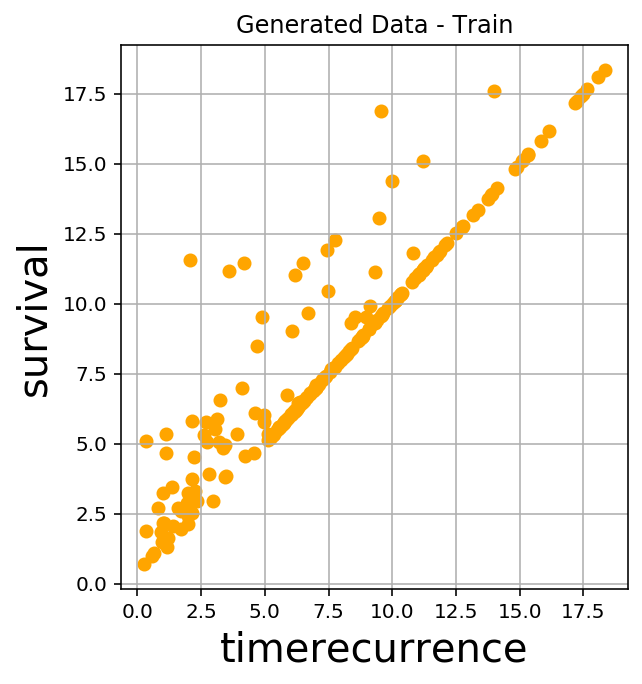

In [24]:
#let's plot our split data to see how it looks!
plt.figure(figsize=(10,5))

# plot the train set
plt.subplot(1,2,1)
plt.scatter(x_train, y_train, c='orange')
plt.xlabel('timerecurrence', fontsize = 20)
plt.ylabel('survival', fontsize = 20)
plt.title('Generated Data - Train')
plt.grid('on')

In [104]:
linr2 = LinearRegression()
#Fit (train) the model -- this is where the ML happens!
linr2.fit(x_train, y_train)

print(linr2.intercept_, linr2.coef_[0])

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [103]:
y_hat = linr2.predict(x_test)

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [101]:
#plotting results
plt.figure(figsize=(10,5))
plt.plot(x_test, y_hat)

plt.scatter(x_test, y_test, c='orange')

plt.xlabel('timereccurrence', fontsize = 20) 
plt.ylabel('survival', fontsize = 20)
plt.title('Generated Data - Test')
plt.grid('on')
plt.show()

NameError: name 'y_hat' is not defined

<Figure size 720x360 with 0 Axes>

In [0]:
#Read in your data into a pandas dataframe by replacing the filename variable with your file's path. You can also use the current code below to work on a mpg dataset, where the target variable we are predicting is miles per gallon based on other car features.

#We should choose two columns that we want to run regresssion on. Use the .head() function to decide which columns would be best!

#pandas docs - https://pandas.pydata.org/docs/reference/index.html#api

#seaborn docs - https://seaborn.pydata.org/api.html

In [55]:
filename = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/mpg.csv'



In [58]:
my_data = pd.read_csv(filename) #TODO: read in your file by replacing the filename variable with your file's path. You can also use this current code to work on an automobile dataset! 

In [0]:
#SVM

In [0]:
SVM & Random Forest

In [29]:
my_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [30]:
#cleaning the data -- dropping missing and duplicate values for sanity
my_data.dropna(inplace = True)
my_data.drop_duplicates(inplace = True)
my_data = my_data.reset_index(drop=True)
length = len(my_data.index) #save length of array of later

In [31]:
my_data["mpg"].min()

9.0

In [32]:
my_data["mpg"].max()

46.6

In [33]:
my_data["mpg"].mean()

23.445918367346938

(array([30., 89., 58., 52., 36., 40., 29., 34., 18.,  6.]),
 array([1613. , 1965.7, 2318.4, 2671.1, 3023.8, 3376.5, 3729.2, 4081.9,
        4434.6, 4787.3, 5140. ]),
 <a list of 10 Patch objects>)

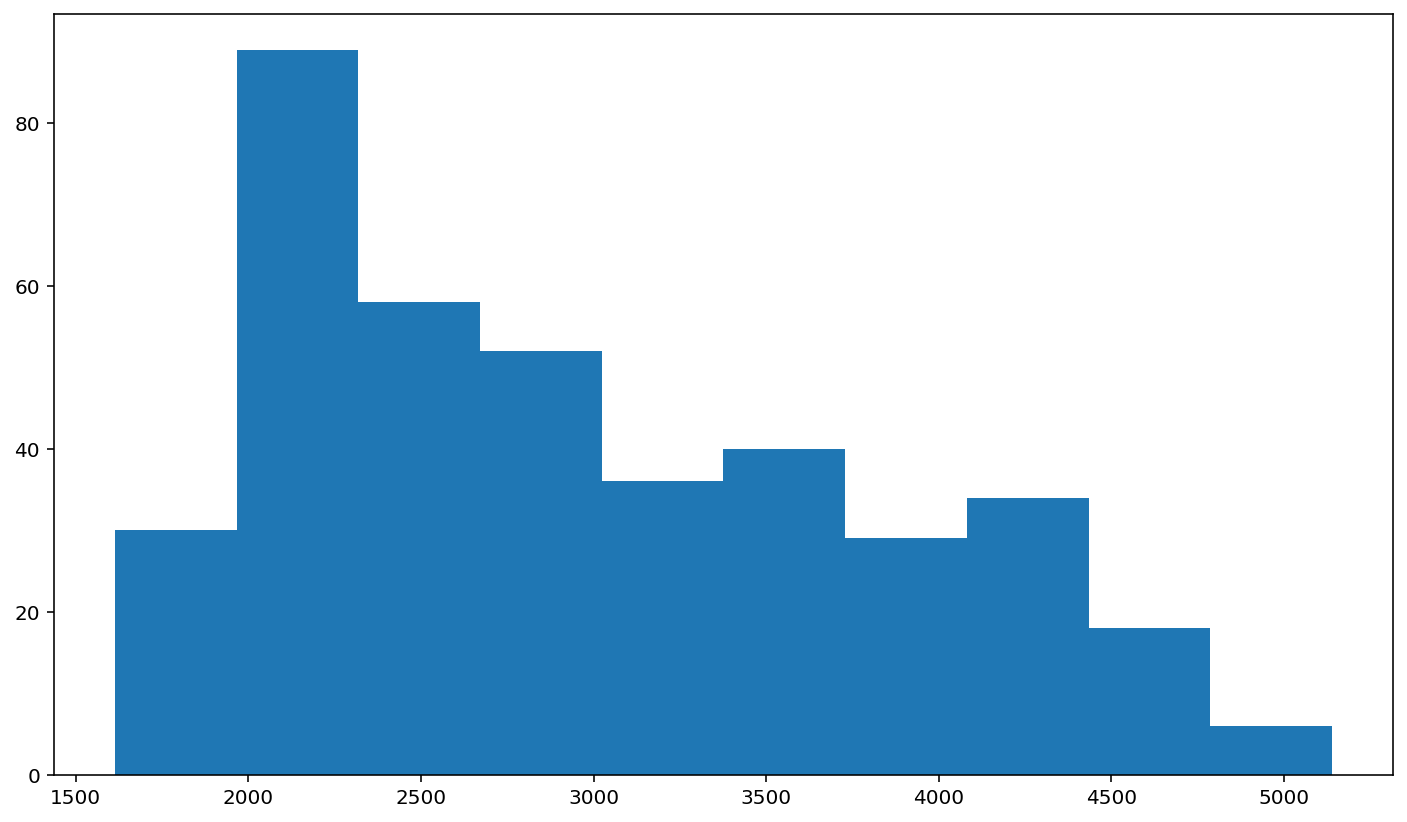

In [34]:
plt.hist(my_data["weight"])

In [35]:
my_data.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
5,15.0,8,429.0,198.0,4341,10.0,70,usa,ford galaxie 500
6,14.0,8,454.0,220.0,4354,9.0,70,usa,chevrolet impala
7,14.0,8,440.0,215.0,4312,8.5,70,usa,plymouth fury iii
8,14.0,8,455.0,225.0,4425,10.0,70,usa,pontiac catalina
9,15.0,8,390.0,190.0,3850,8.5,70,usa,amc ambassador dpl


In [0]:
# for mpg value lower than 20, it'll be labeled as low,
# for mpg higher than 20, we'll label it as high. 

In [61]:
my_data["weight"].min()

1613

In [60]:
my_data["weight"].max()

5140

In [39]:
def divide_weight(x):
    if float(x) <= 3000:
        return "low"
    else:
        return "high"

In [59]:
my_data["weight"].apply(divide_weight)

0      high
1      high
2      high
3      high
4      high
       ... 
393     low
394     low
395     low
396     low
397     low
Name: weight, Length: 398, dtype: object

In [62]:
my_data["weight_type"] = my_data["weight"].apply(divide_weight)

In [63]:
my_data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,weight_type
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,high
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,high
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,high
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,high
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,high
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl,low
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup,low
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage,low
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger,low


In [14]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
from sklearn import svm

In [71]:
X = my_data[["horsepower", "acceleration"]].to_numpy() 

In [69]:
y = my_data ["mpg"]

In [106]:
idx = np.arange(len(X))
np.random.shuffle(idx)

split_threshold = int(len(X) * 0.8)

In [107]:
x_train = X[:split_threshold]
x_test = X[split_threshold:]

y_train = y[:split_threshold]
y_test = y[split_threshold:]

In [108]:
random forest

SyntaxError: invalid syntax (<ipython-input-108-890cb172d6f4>, line 1)

In [109]:
y_train

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
313    28.0
314    26.4
315    24.3
316    19.1
317    34.3
Name: mpg, Length: 318, dtype: float64

In [110]:
clf = RandomForestClassifier(max_depth = 30, random_state = 20, n_estimators = 20)

In [123]:
pd.DataFrame(X)

,0,1
0,130.0,12.0
1,165.0,11.5
2,150.0,11.0
3,150.0,12.0
4,140.0,10.5
...,...,...
393,86.0,15.6
394,52.0,24.6
395,84.0,11.6
396,79.0,18.6


In [127]:
clf.fit(x_train, y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [125]:
y_hat = clf.predict(x_test)

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [126]:
from sklearn.tree import export_graphviz
# Export as dot file

estimator = clf.estimators_[15]

AttributeError: 'RandomForestClassifier' object has no attribute 'estimators_'

In [0]:
export_graphviz(estimator, out_file='tree.dot',
                rounded = True, proportion = False, 
                precision = 2, filled = True)

In [0]:
# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

In [47]:
clf = svm.SVC()

In [48]:
clf.fit(x_train, y_train)

SVC()

In [49]:
y_hat = clf.predict(x_test)
y_hat

array(['low', 'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low',
       'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low', 'high',
       'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low',
       'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low',
       'low', 'low', 'low', 'low', 'low', 'low', 'low', 'high', 'high',
       'high', 'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low',
       'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low',
       'low', 'low', 'low', 'low', 'high', 'low', 'low', 'high', 'low',
       'low', 'low', 'low', 'low', 'low', 'low', 'low'], dtype=object)

In [50]:
y_test

313    high
314    high
315     low
316     low
317     low
       ... 
387     low
388     low
389     low
390     low
391     low
Name: weight_type, Length: 79, dtype: object

In [51]:
from sklearn import metrics

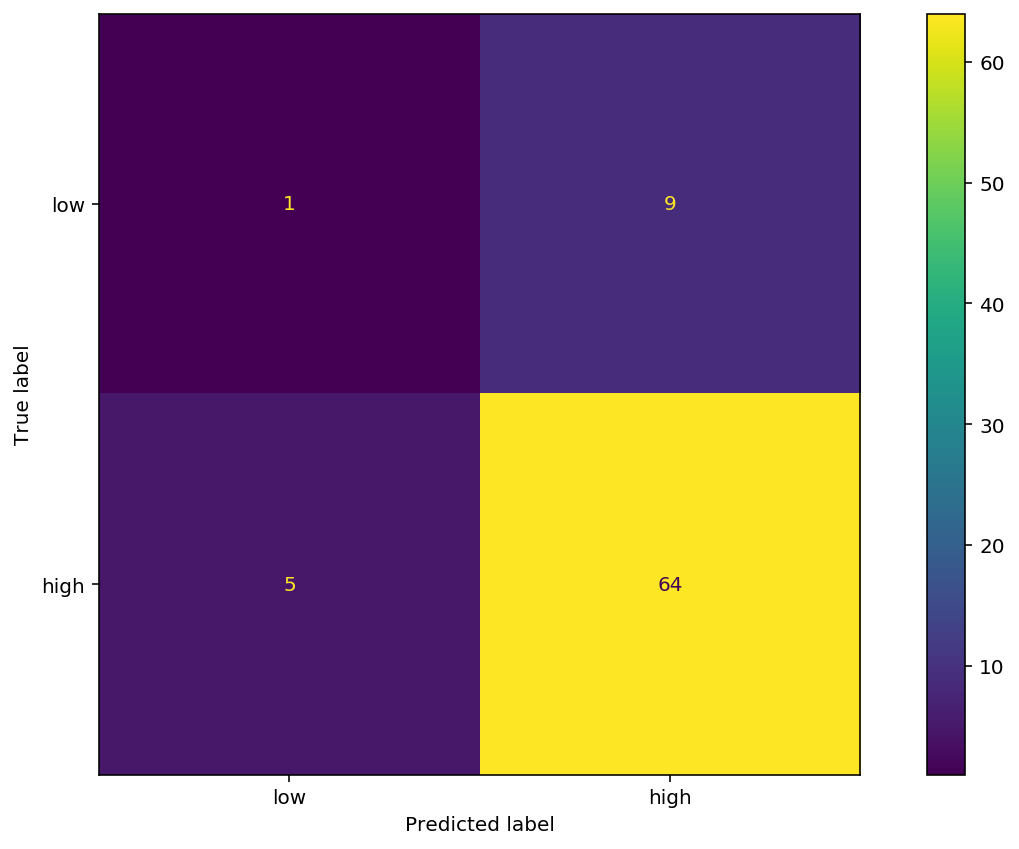

In [52]:
confusion_matrix = metrics.confusion_matrix(y_test, y_hat)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["low", "high"])

cm_display.plot()

plt.show()

In [53]:
(9 + 5) / 79

0.17721518987341772

In [0]:
#Linear regression naturally works best on highly correlated data, so I'm going to create a heatmap to see which variables are correlated!


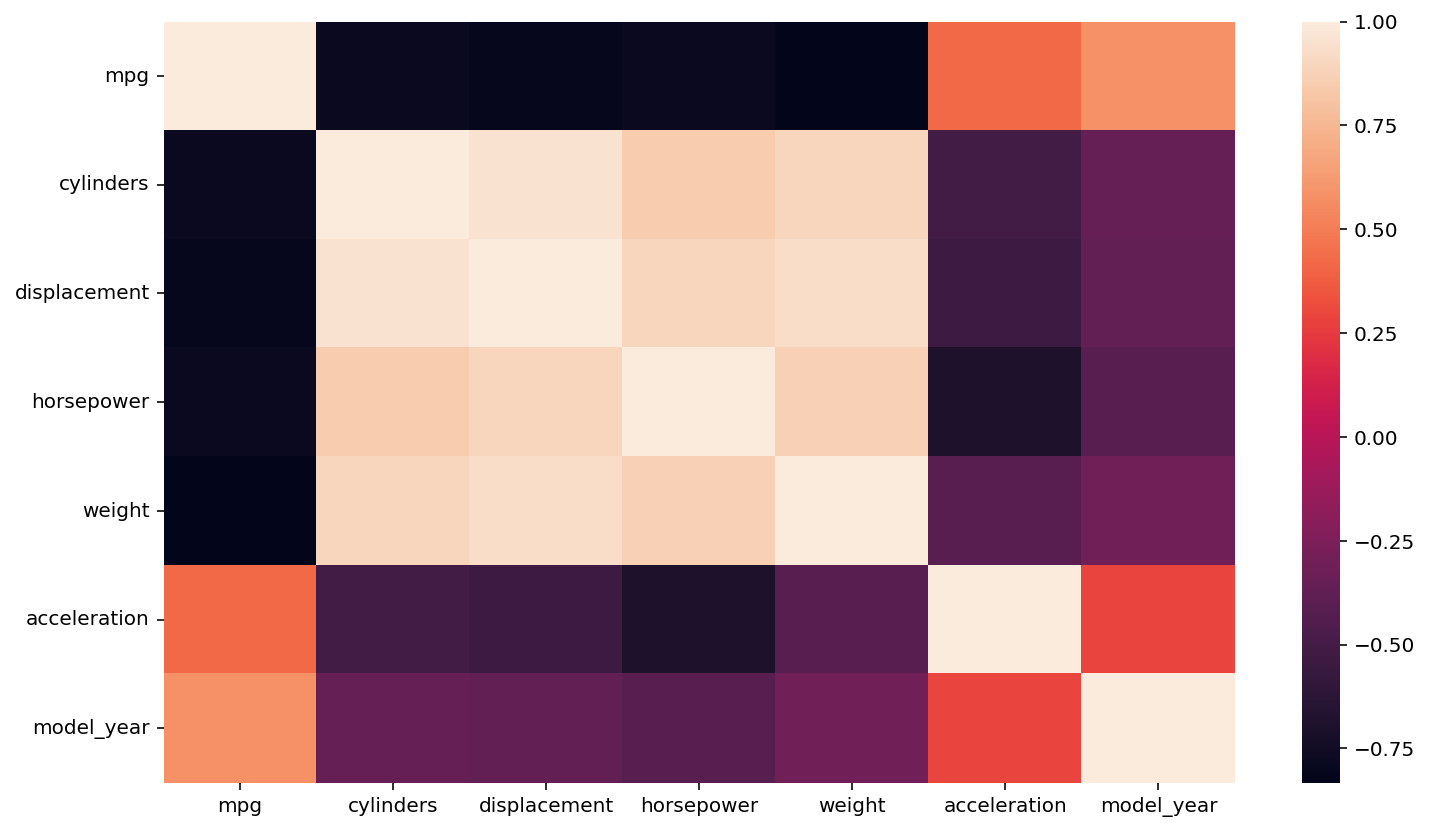

In [55]:
sns.heatmap(my_data.corr())

### Getting to know the problem

For my data, my columns inlude `'mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', and 'name'`. 

To start, I would like to create a linear regression model that uses horsepower (X) to predict miles per gallon (y) and see how strong our linear regression model is. For your data, you should choose two columns as well to represent X and y.


In [56]:
X = my_data[["horsepower", "weight"]]

In [57]:
X

,horsepower,weight
0,130.0,3504
1,165.0,3693
2,150.0,3436
3,150.0,3433
4,140.0,3449
...,...,...
387,86.0,2790
388,52.0,2130
389,84.0,2295
390,79.0,2625


In [58]:
type(X)

pandas.core.frame.DataFrame

In [59]:
type(X.to_numpy())

numpy.ndarray

In [60]:
X = my_data[["horsepower", "weight"]].to_numpy()

y = my_data["mpg"].to_numpy()

# Linear Regression with Scikit-learn's linear regression

We can use Scikit-Learn’s Linear Regression to fit the model. Most other models we will use in the course 

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html



### Split the data

Our model should ignore 20% of data points to use for testing so it doesn't just memorize the data. We need to make sure there are no missing data points before continuing.



np docs - https://numpy.org/doc/stable/reference/index.html#reference



In [61]:
X.shape

(392, 2)

In [62]:
y.shape

(392,)

In [63]:
idx = np.arange(len(X)) #392

In [64]:
idx

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [65]:
np.random.shuffle(idx)

In [83]:
idx

array([309, 148,  25, 281,  89,  75, 252, 234, 129, 272,  44, 231,  77,
        97, 298,  23,  47, 128, 350, 133, 117,  91, 366, 113, 249, 222,
       192, 138, 286, 196, 215,  59, 195, 340, 323, 363, 135,  93, 149,
       130, 274,  99, 103,   7, 300,  35, 303,  38,  10, 180,  69, 194,
       165, 285, 361, 295, 264, 198, 164, 212, 289,  41, 270, 238, 305,
       237, 124, 102, 153,  96, 107, 244, 120, 172,  39, 292, 246, 182,
       368,   8, 228, 183, 236, 185, 106,  52, 342, 307, 302, 144, 166,
       324, 213, 259, 223, 337, 112, 208, 334, 360, 290,  48,  40, 114,
       110, 321,  95, 118,  53,  88, 332,  17, 383, 333, 227, 279, 188,
       207,  71, 299, 141, 347, 154,  84,  58,   4, 376, 216, 255, 386,
       155, 248, 243,  72,  30,  78, 327,  70, 253, 336, 317, 282, 296,
       301, 377, 197,  68, 314, 116, 132, 352, 369, 200,  90, 233,  56,
       131, 204, 152, 220,  11, 284, 254,  34, 142,  29, 319,  21, 358,
       146, 365, 331, 339, 330, 178, 378,  50,  86, 239, 348, 17

In [67]:
len(X) * 0.8

313.6

In [68]:
split_threshold = int(len(X) * 0.8)
split_threshold

313

In [69]:
train_idx = idx[:split_threshold]

In [70]:
test_idx = idx[split_threshold:]

In [71]:
len(test_idx)

79

In [72]:
x_train = X[train_idx]

In [73]:
x_train

array([[ 100., 2634.],
       [ 130., 3840.],
       [ 110., 3645.],
       [ 130., 4295.],
       [  90., 2408.],
       [  88., 2395.],
       [  85., 2990.],
       [ 150., 4997.],
       [  95., 2278.],
       [  88., 3021.],
       [  67., 1850.],
       [ 140., 4215.],
       [ 110., 2945.],
       [  90., 3420.],
       [  86., 2226.],
       [  90., 2648.],
       [  46., 1835.],
       [  67., 2000.],
       [ 115., 2595.],
       [  76., 2511.],
       [ 155., 4502.],
       [  60., 1760.],
       [ 150., 3436.],
       [ 105., 3613.],
       [ 153., 4129.],
       [  85., 3465.],
       [ 105., 3380.],
       [ 110., 3907.],
       [  90., 2735.],
       [  84., 2635.],
       [  87., 2672.],
       [ 100., 3278.],
       [  81., 2220.],
       [ 145., 4082.],
       [  95., 3102.],
       [  68., 2155.],
       [ 140., 4141.],
       [ 150., 4699.],
       [ 100., 2789.],
       [  86., 2464.],
       [  68., 1970.],
       [  52., 2035.],
       [ 165., 4209.],
       [ 16

In [74]:
y_train = y[train_idx]

In [75]:
x_test = X[test_idx]

In [76]:
y_test = y[test_idx]

In [77]:
x_train= x_train.reshape(-1, 2)

y_train= y_train.reshape(-1, 1)

x_test = x_test.reshape(-1, 2)

In [84]:
# Checking for Missing Data
if X.shape[0] != y.shape[0]:
  print("It looks like you have missing data. You may want to preprocess your data more with pandas to delete any rows with missing, NaN, N/A, and null values.")




idx = np.arange(length) #shuffle our dataset indices so we don't always split the same way!
np.random.shuffle(idx)

#split our data with 80% for training (learning) and 20% for testing.
split_threshold = int(length * 0.8)

train_idx = idx[:split_threshold]
# Uses the remaining indices for testing
test_idx = idx[split_threshold:]

# Generates train and test sets and formats them for training.
x_train, y_train = X[train_idx], y[train_idx]
x_test, y_test = X[test_idx], y[test_idx]
x_train= x_train.reshape(-1, 1)
y_train= y_train.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)

ValueError: x and y must be the same size

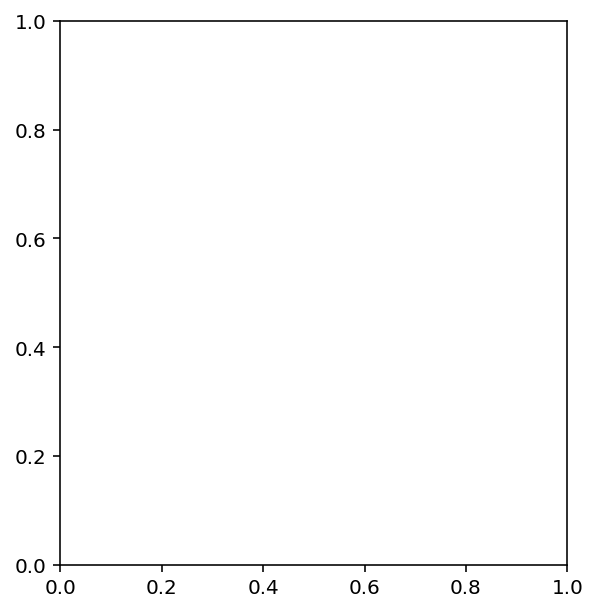

In [85]:
#let's plot our split data to see how it looks!
plt.figure(figsize=(10,5))

# plot the train set
plt.subplot(1,2,1)
plt.scatter(x_train, y_train, c='orange')
plt.xlabel('x', fontsize = 20)
plt.ylabel('y', fontsize = 20)
plt.title('Generated Data - Train')
plt.grid('on')

ValueError: x and y must be the same size

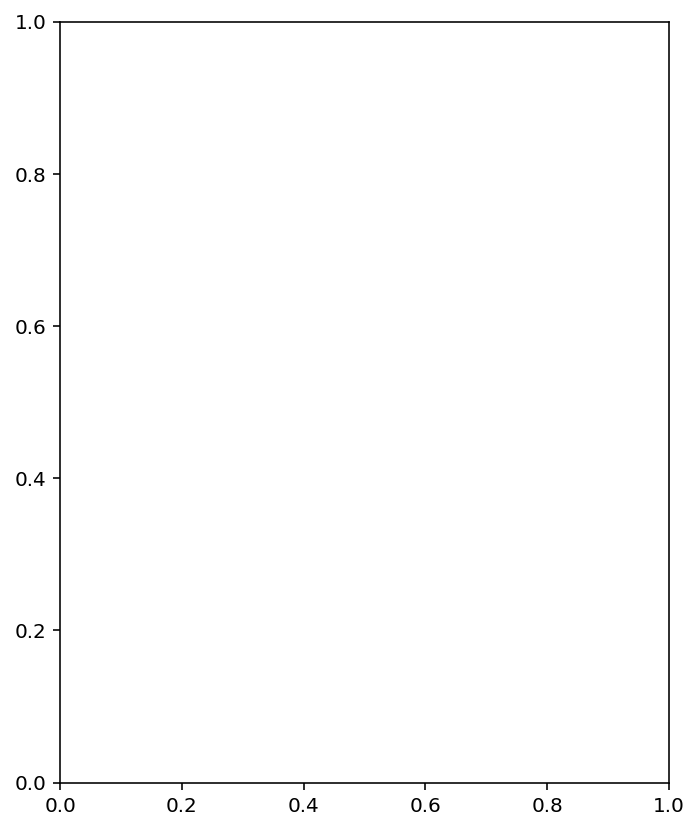

In [47]:
# plot the test set 
plt.subplot(1,2,2)
plt.scatter(x_test, y_test)  
plt.xlabel('x', fontsize = 20) 
plt.ylabel('y', fontsize = 20)
plt.title('Generated Data - Test')
plt.grid('on')

plt.show()

### Creating and Fitting

In [86]:
from sklearn.linear_model import LinearRegression

In [87]:
#Create the model object
linr = LinearRegression()

In [88]:
type(linr)

sklearn.linear_model._base.LinearRegression

In [89]:
print(linr.intercept_, linr.coef_[0])

AttributeError: 'LinearRegression' object has no attribute 'intercept_'

In [90]:
#Create the model object
linr = LinearRegression()
#Fit (train) the model -- this is where the ML happens!
linr.fit(x_train, y_train)
print(linr.intercept_, linr.coef_[0])

ValueError: Found input variables with inconsistent numbers of samples: [626, 313]

In [56]:
from sklearn.linear_model import LinearRegression
#Create the model object
linr = LinearRegression()
#Fit (train) the model -- this is where the ML happens!
linr.fit(x_train, y_train)
print(linr.intercept_, linr.coef_[0])

ValueError: Found input variables with inconsistent numbers of samples: [626, 313]

### Creating Predictions
Predict outputs on our x_test data that we held out. Think of this as a way to see how the model does on new data!

In [91]:
# Predicting using SKLearn

# y_hat is the predicted vlaue of y_test
y_hat = linr.predict(x_test)

# y = 39.36562799 + (-0.15297545 * x)


NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [58]:
#plotting results
plt.figure(figsize=(10,5))
plt.plot(x_test, y_hat, '--')

NameError: name 'y_hat' is not defined

<Figure size 720x360 with 0 Axes>

ValueError: x and y must be the same size

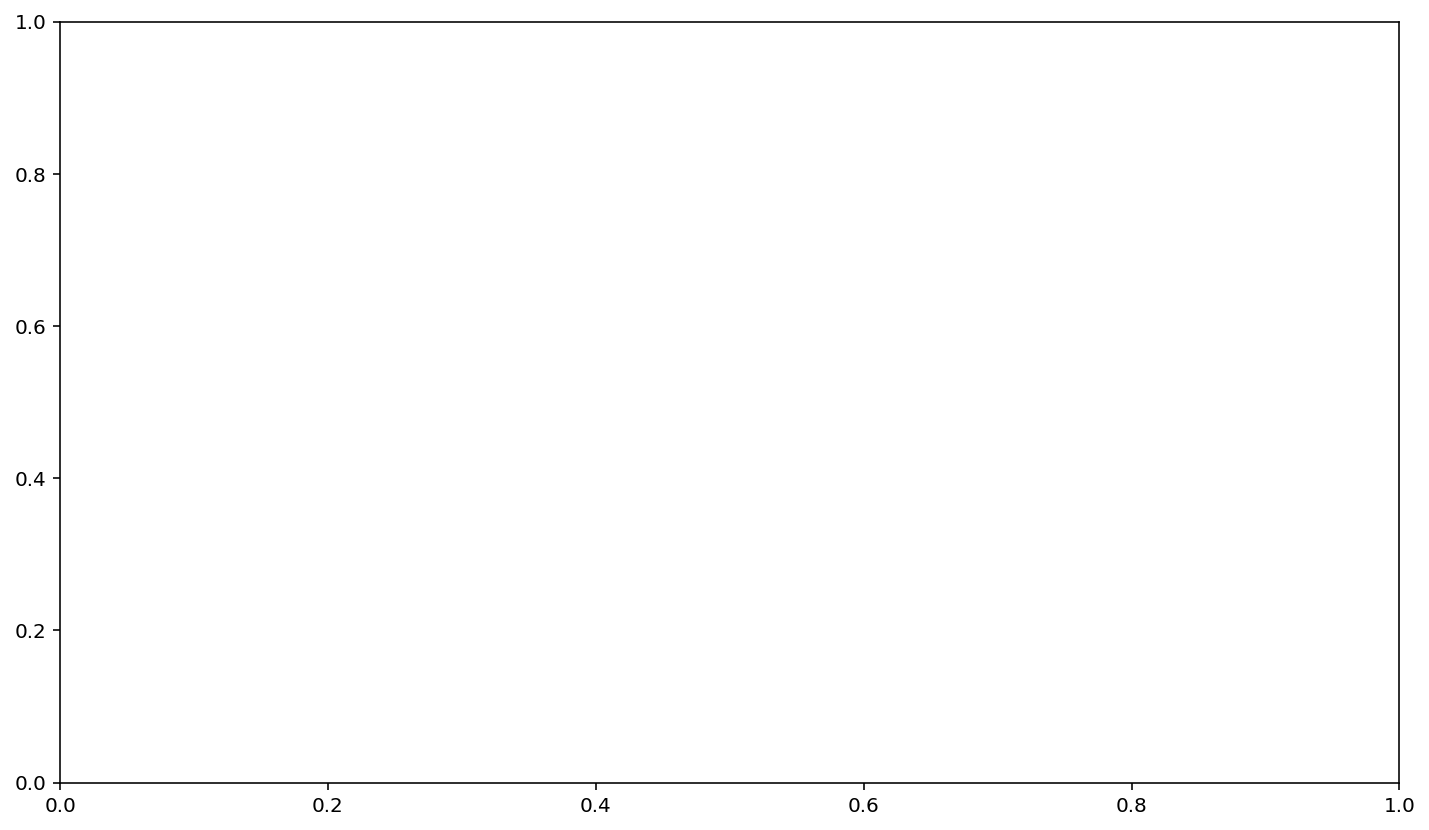

In [92]:
plt.scatter(x_test, y_test, c='orange')
plt.xlabel('x', fontsize = 20)
plt.ylabel('y', fontsize = 20)
plt.title('Generated Data - Test')
plt.grid('on')
plt.show()

In [60]:
#plotting results
plt.figure(figsize=(10,5))
plt.plot(x_test, y_hat)

plt.scatter(x_test, y_test, c='orange')

plt.xlabel('x', fontsize = 20) 
plt.ylabel('y', fontsize = 20)
plt.title('Generated Data - Test')
plt.grid('on')
plt.show()

NameError: name 'y_hat' is not defined

<Figure size 720x360 with 0 Axes>

### Results and Evaluation
One way to see if the model is pretty good is the coefficient of determination (R^2) using the `score()` function. You can read about it here: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score.

Another way is to compare our mean absolute error (MAE). MAE measures the prediction error. Mathematically, it is the average absolute difference between observed and predicted outcomes, MAE = mean(abs(observeds - predicteds)). MAE is less sensitive to outliers compared to RMSE.

Read some more about regression model metrics [here](http://www.sthda.com/english/articles/38-regression-model-validation/158-regression-model-accuracy-metrics-r-square-aic-bic-cp-and-more/).

In [61]:
# print(linr.score(x_test, y_test))

In [62]:
MAE = np.mean(abs(y_test - y_hat))
MAE

NameError: name 'y_hat' is not defined

# Repeat the process!
Try running linear regression on multiple combinations of features (columns) on your dataset. What combination yields the best score? How does this connect to your correlation chart? 